# Predicting heart disease using Machine Learning

Using Python-based machine learning and data science libraries to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes

## Data

The original data came from Cleveland data from the UCI Machine Learning Repository https://archive.ics.uci.edu/dataset/45/heart+disease 

## Goal
Achieve almost 95% accuracy 

## Features
### Data Dictionary
1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart\n",12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools

In [53]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [54]:
# Regular EDA and plotting libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

# Models from Scikit-Learn
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay,RocCurveDisplay 

## Load data

In [55]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


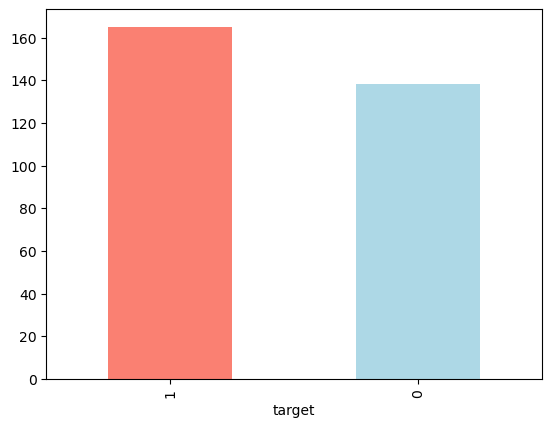

In [56]:
heart_disease["target"].value_counts().plot(kind="bar",color = ["salmon", "lightblue"] );

# Exploratory Data Analysis

In [57]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [58]:
#Check for any missing data
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [59]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Frequency of having heart disease based on individual's sex

In [60]:
heart_disease.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

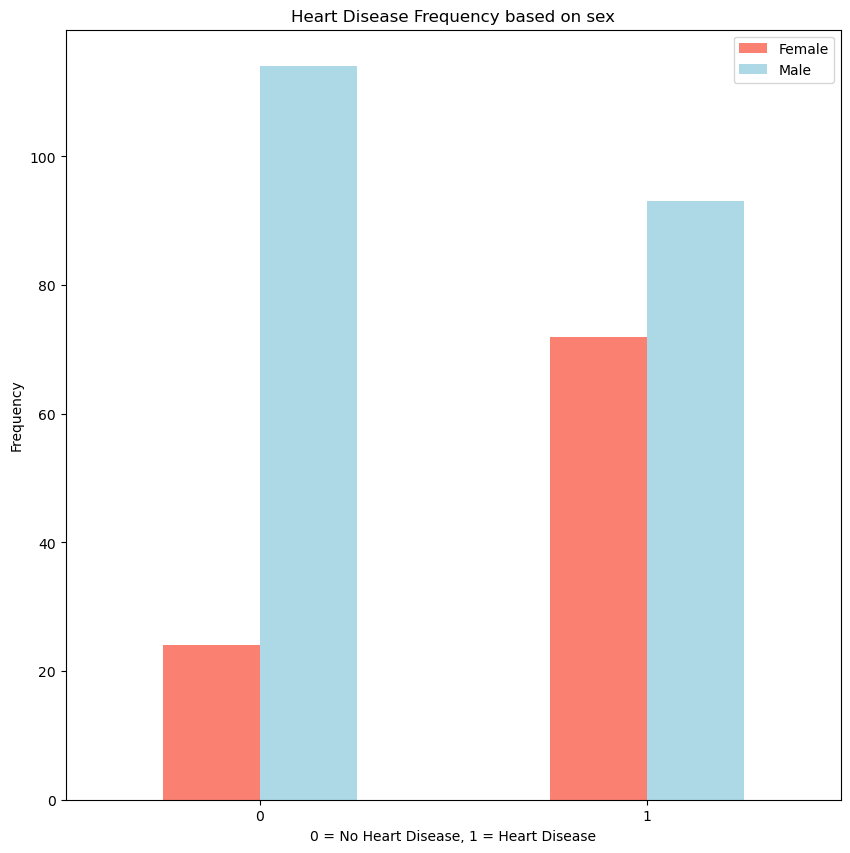

In [61]:
#compare the sex column with the target column 
pd.crosstab(heart_disease.target, heart_disease.sex).plot(kind ="bar", figsize=(10,10), color=["salmon","lightblue"])
plt.title("Heart Disease Frequency based on sex")
plt.xlabel("0 = No Heart Disease, 1 = Heart Disease")
plt.ylabel("Frequency")
plt.legend(['Female', 'Male'])
plt.xticks(rotation = 0)

## Age vs Max heart rate for heart disease

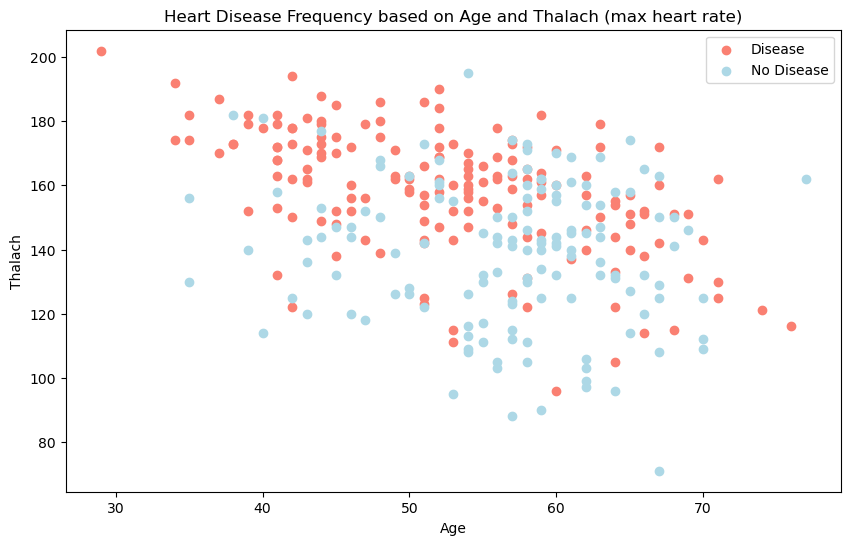

In [62]:
plt.figure(figsize=(10,6))
#Scatterplot with positive examples
plt.scatter(heart_disease.age[heart_disease.target==1],
            heart_disease.thalach[heart_disease.target==1],
            c ="salmon")
#Scatterplot with negative examples
plt.scatter(heart_disease.age[heart_disease.target==0], heart_disease.thalach[heart_disease.target==0], c = "lightblue")

plt.title("Heart Disease Frequency based on Age and Thalach (max heart rate)");
plt.xlabel("Age");
plt.ylabel("Thalach");
plt.legend(["Disease","No Disease"]);

Text(0.5, 0, 'Chol')

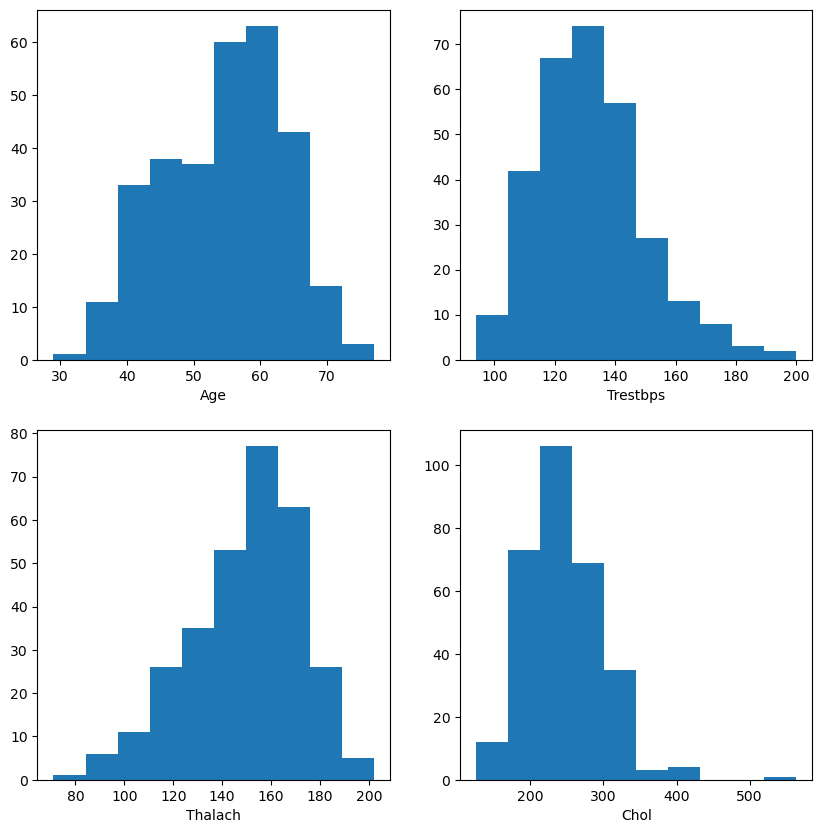

In [63]:
# Check Distributions of the Data in each column
fig, ((ax1,ax2),(ax3,ax4))= plt.subplots(nrows=2, ncols=2, figsize=(10,10))
ax1.hist(heart_disease["age"])
ax1.set_xlabel("Age")
ax2.hist(heart_disease["trestbps"])
ax2.set_xlabel("Trestbps")
ax3.hist(heart_disease["thalach"])
ax3.set_xlabel("Thalach")
ax4.hist(heart_disease["chol"])
ax4.set_xlabel("Chol")

## Heart Disease Frequency per Chest Pain Type

In [64]:
pd.crosstab(heart_disease.cp, heart_disease.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

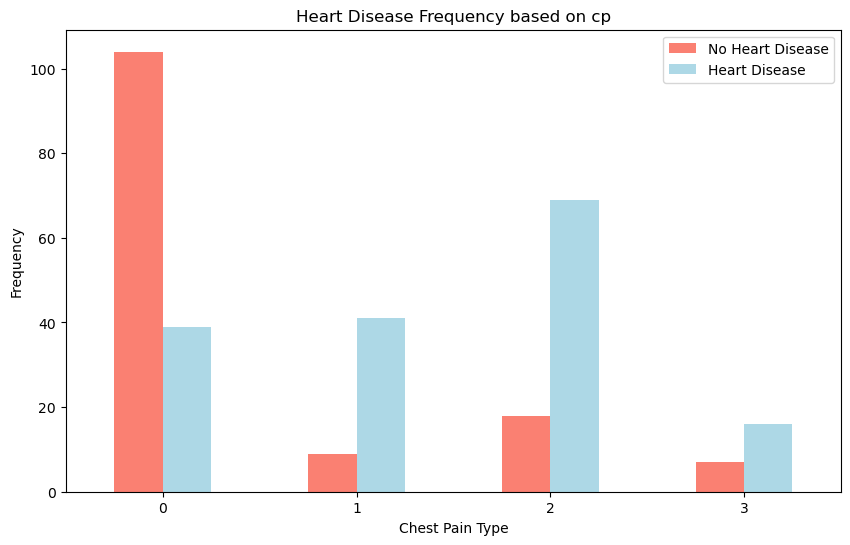

In [65]:
#compare the chest pain (cp) column with the target column 
pd.crosstab(heart_disease.cp, heart_disease.target).plot(kind ="bar", figsize=(10,6), color=["salmon","lightblue"])
plt.title("Heart Disease Frequency based on cp")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.xticks(rotation = 0)

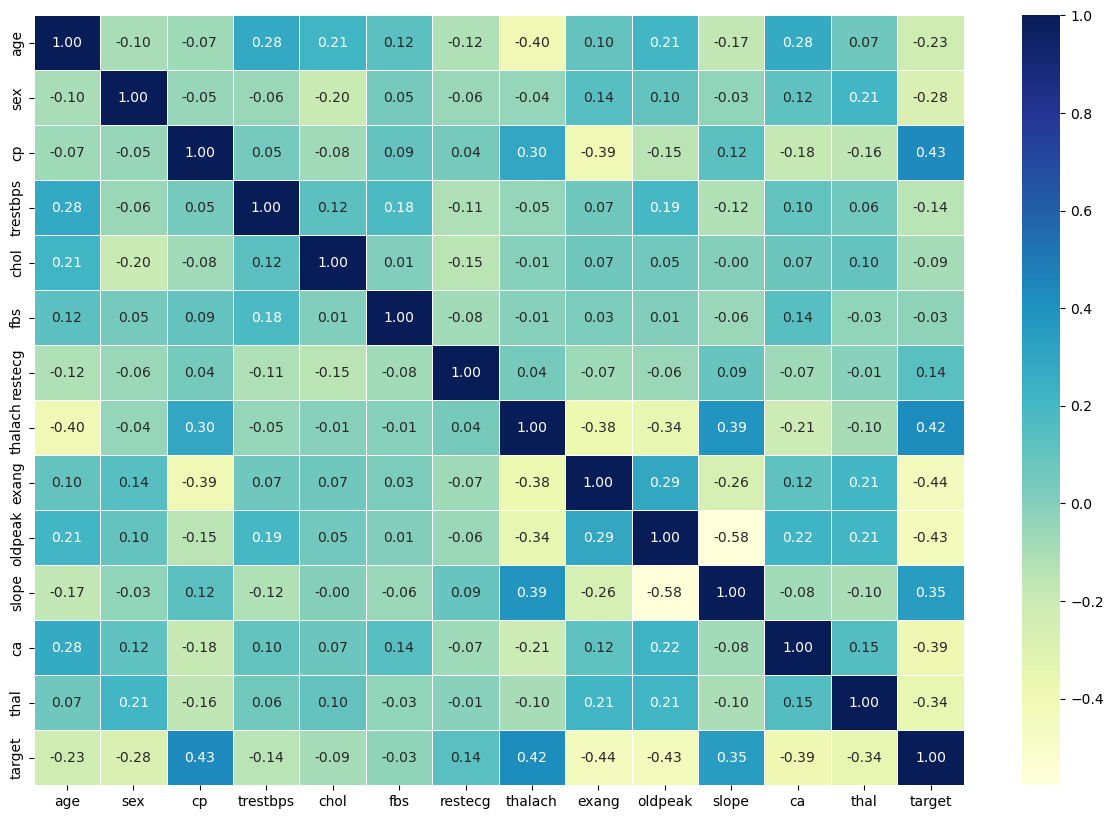

In [66]:
corr_matrix = heart_disease.corr()
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix ,
                 annot= True,
                 linewidths = 0.5,
                 fmt = ".2f",
                 cmap = 'YlGnBu');

## Modeling

In [67]:
X= heart_disease.drop("target", axis =1)
y = heart_disease["target"]

In [68]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2)

In [69]:
clf = LinearSVC()
clf.fit(X_train,y_train)

/Users/falakraheja/Desktop/heart-disease-project/env/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/falakraheja/Desktop/heart-disease-project/env/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

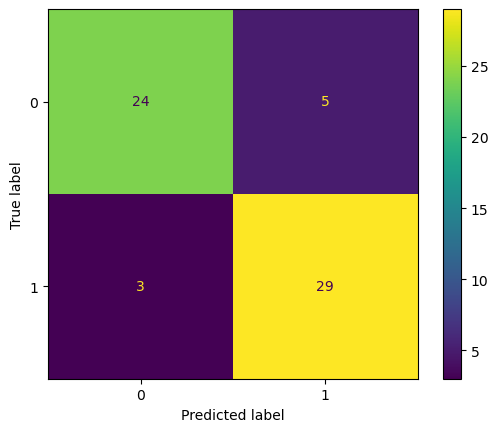

In [70]:
y_preds = clf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_true = y_test, y_pred = y_preds);

In [71]:
clf.score(X_train, y_train),clf.score(X_test, y_test)

(0.7933884297520661, 0.8688524590163934)

In [72]:
#Compare models
model_comparison = {"LogReg":LogisticRegression(), "KNC":KNeighborsClassifier(), 
                    "RFC":RandomForestClassifier()}
model_score_test_data={}

def comparison(model_list, X_train, X_test, y_train, y_test):
    for name, model in model_list.items():
        model.fit(X_train,y_train)
        model_score_test_data[name]=model.score(X_test,y_test)
    return  model_score_test_data

In [73]:
comparison(model_comparison, X_train,X_test,y_train,y_test)

/Users/falakraheja/Desktop/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogReg': 0.8852459016393442,
 'KNC': 0.6885245901639344,
 'RFC': 0.8524590163934426}

## Hyperparameter tuning using RandomizedSearchCV

In [74]:
#hyperparmater grid for LogisticRegression
log_reg_grid = {"C":np.logspace(-4,4,20),
                "solver":["liblinear"]}
#hyperparmater grid for RandomForestClassifier
rf_grid = {"n_estimators":np.arange(10,1000,50),
           "max_depth" : [None,3,5,10],
           "min_samples_split" :np.arange(2,20,2),
           "min_samples_leaf" : np.arange(1,20,2)}


In [75]:
# Tuning Logisitic Regression
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                cv=5,
                                n_iter = 20,
                                verbose=True)
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [76]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [77]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

In [78]:
# Another attempt at tuning using more hyperparameter options
np.random.seed(42)
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]
new_rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = param_grid,
                                cv=5,
                                n_iter = 20,
                                verbose=True)
new_rs_log_reg.fit(X_train,y_train)
new_rs_log_reg.score(X_test,y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Users/falakraheja/Desktop/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/falakraheja/Desktop/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/falakraheja/Desktop/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/falakraheja/Desktop/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/falakraheja/Desktop/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarni

0.8688524590163934

In [79]:
# Tuning RandomForestClassification
np.random.seed(42)
rs_rfc = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions = rf_grid,
                                cv=5,
                                n_iter = 20,
                                verbose=True)
rs_rfc.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [80]:
rs_rfc.score(X_test,y_test)

0.8688524590163934

## Hyperparameter tuning with GridSearchCV

Moving forward with Logistic Regression model since it provided the best score so far 

In [81]:
# Trying to improve the model using GridSearchCV
log_reg_grid = {"C":np.logspace(-4,4,30),
                "solver":["liblinear"]}
np.random.seed(42)
gs_log_reg = GridSearchCV(LogisticRegression(),
                                param_grid = log_reg_grid,
                                cv=5,
                                verbose=True)
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [82]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

## Evaluating the tuned machine learning model beyond just measuring accuracy

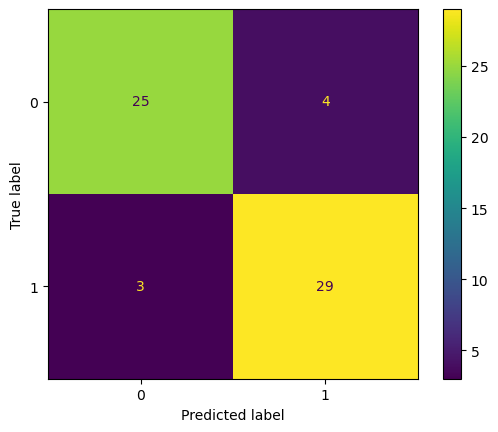

In [83]:
#Confusion matrix 
y_preds = gs_log_reg.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_true = y_test, y_pred = y_preds);

In [86]:
#Classification report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate Evalutation metrics using cross-validation

In [87]:
#Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [93]:
# a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418, solver="liblinear")

In [98]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,X,y,cv=5,scoring = "accuracy")
cv_ac

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [99]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [100]:
# Cross-validated precision
cv_prec = cross_val_score(clf,X,y,cv=5,scoring = "precision")
cv_prec = np.mean(cv_prec)
cv_prec

0.8207936507936507

In [103]:
# Cross-validated recall
cv_recall = cross_val_score(clf,X,y,cv=5,scoring = "recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [105]:
# Cross-validated f1_score
cv_f1 = cross_val_score(clf,X,y,cv=5,scoring = "f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

<Axes: title={'center': 'Cross-Validated Classification Metrics'}>

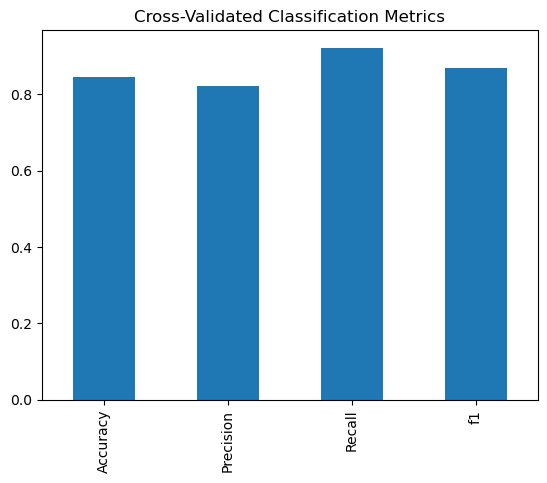

In [119]:
# Visualization of cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc, "Precision": cv_prec,"Recall": cv_recall, "f1": cv_f1}, index=[0])
cv_metrics.T.plot(kind="bar",title="Cross-Validated Classification Metrics", legend=False)

## Feature Importance

In [120]:
clf.fit(X_train,y_train)
#check coef_
clf.coef_

array([[ 0.00316728, -0.8604465 ,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275846,  0.02459361, -0.60413079, -0.56862804,
         0.45051628, -0.63609897, -0.67663372]])

In [122]:
# dictionary where coefficients of features 
features_dic = dict(zip(heart_disease.columns, list(clf.coef_[0])))
features_dic

{'age': 0.0031672800489608455,
 'sex': -0.8604464974271708,
 'cp': 0.6606704082728109,
 'trestbps': -0.01156993196274824,
 'chol': -0.0016637440923087717,
 'fbs': 0.04386107313075342,
 'restecg': 0.3127584615862929,
 'thalach': 0.02459361332045646,
 'exang': -0.6041307948760266,
 'oldpeak': -0.568628039197438,
 'slope': 0.4505162753782247,
 'ca': -0.636098965095586,
 'thal': -0.6766337239240338}

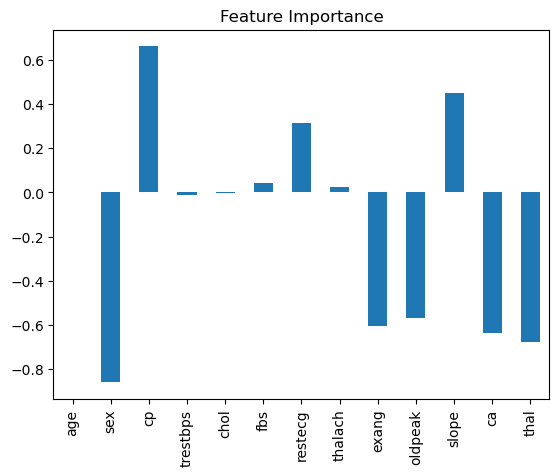

In [127]:
features_visual = pd.DataFrame(features_dic, index=[0]);
features_visual.T.plot(kind="bar",title="Feature Importance",legend=None)
features_visual;

In [129]:
pd.crosstab(heart_disease["sex"],heart_disease["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [130]:
pd.crosstab(heart_disease["slope"],heart_disease["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope - the slope of the peak exercise ST segment
* 0: Upsloping: better heart rate with exercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downsloping: signs of unhealthy heart

## Experimentation

In [156]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 14.4 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [189]:
# trying Extreme Gradient Boosting
import xgboost as xgb 
xgb_clf = xgb.XGBClassifier(random_state=123)
#xgb_clf.get_params()
xgb_clf.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=123, ...)

In [160]:
xgb_clf.score(X_test,y_test)

0.819672131147541

### Hyperparameter tuning

In [190]:
# Dictionary with n_estimators matched with the model's score accordingly
n_estimator_dic ={}

# function to determine the optimal number of boosting trees and best hyperparameters to increase model's performance
def check(num):
    for i in range(num,20):
        param_grid = { 'n_estimators' : [i],
        'max_depth': [3, 5, 7, 10],
        'learning_rate': [0.1, 0.01, 0.001],
        'subsample': [0.2,0.4,0.6,0.8,1]
        }
        
        # Create the XGBoost model object
        xgb_model = xgb.XGBClassifier()
        
        # Create the GridSearchCV object
        grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')
        
        # Fit the GridSearchCV object to the training data
        grid_search.fit(X_train, y_train)
        
        n_estimator_dic[f"{i}"]=grid_search.score(X_test,y_test)

    return n_estimator_dic
        

In [191]:
check(1)

{'1': 0.5245901639344263,
 '2': 0.8852459016393442,
 '3': 0.8852459016393442,
 '4': 0.8852459016393442,
 '5': 0.8852459016393442,
 '6': 0.9180327868852459,
 '7': 0.9180327868852459,
 '8': 0.8360655737704918,
 '9': 0.8852459016393442,
 '10': 0.9016393442622951,
 '11': 0.8524590163934426,
 '12': 0.9016393442622951,
 '13': 0.8360655737704918,
 '14': 0.8360655737704918,
 '15': 0.8524590163934426,
 '16': 0.8688524590163934,
 '17': 0.8524590163934426,
 '18': 0.8688524590163934,
 '19': 0.8852459016393442}

In [192]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 20, 'subsample': 0.4}

In [197]:
# Final model with the highest accuracy score and closest to goal of attaining 95% accuracy 
#n_estimators: 20 leads to model.score() of "86.88%" Therefore, it's neglected and using n_estimators: 6 as it yielded highest accuracy above
param_grid = { 'n_estimators' : [6],
        'max_depth': [5],
        'learning_rate': [0.1],
        'subsample': [0.4]
        }
xgb_model_final = xgb.XGBClassifier()
final_model = GridSearchCV(xgb_model_final, param_grid, cv=5, scoring='accuracy')
final_model.fit(X_train, y_train)
final_model.score(X_test,y_test)

0.9180327868852459